# Exploratory Data Analysis Using ISL's College Dataset

#### Tegar Dani Pratama

##### 17/11/2019

* **1. Introduction**
* **2. Load and check data**
    * 2.1 Load data
    * 2.2 Check for null and missing values
* **3. Feature analyisis**
* **4. Filling missing value**
* **5. Feature engineering**
* **6. Modelling**



## 1. Introduction

This exercise relates to the College data set, which can be found in the file College.csv. It contains a number of variables for 777 different universities and colleges in the US. The variables are

* `Private:` Public/private indicator
* `Apps:` Number of applications received
* `Accept:` Number of applicants accepted
* `Enroll:` Number of new students enrolled
* `Top10perc:` New students from top 10% of high school class
* `Top25perc:` New students from top 25% of high school class
* `F.Undergrad:` Number of full-time undergraduates
* `P.Undergrad:` Number of part-time undergraduates
* `Outstate:` Out-of-state tuition
* `Room.Board:` Room and board costs
* `Books:` Estimated book costs
* `Personal:` Estimated personal spending
* `PhD:` Percent of faculty with Ph.D.'s
* `Terminal:` Percent of faculty with terminal degree
* `S.F.Ratio:` Student/faculty ratio
* `perc.alumni:` Percent of alumni who donate
* `Expend:` Instructional expenditure per student
* `Grad.Rate:` Graduation rate


source: http://faculty.marshall.usc.edu/gareth-james/ISL/

## 2. Load and check data

### 2.1 Load data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [2]:
df = pd.read_csv('data/college.csv')
df = df.iloc[:,1:]

In [3]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.4+ KB


## 3. Feature Analysis

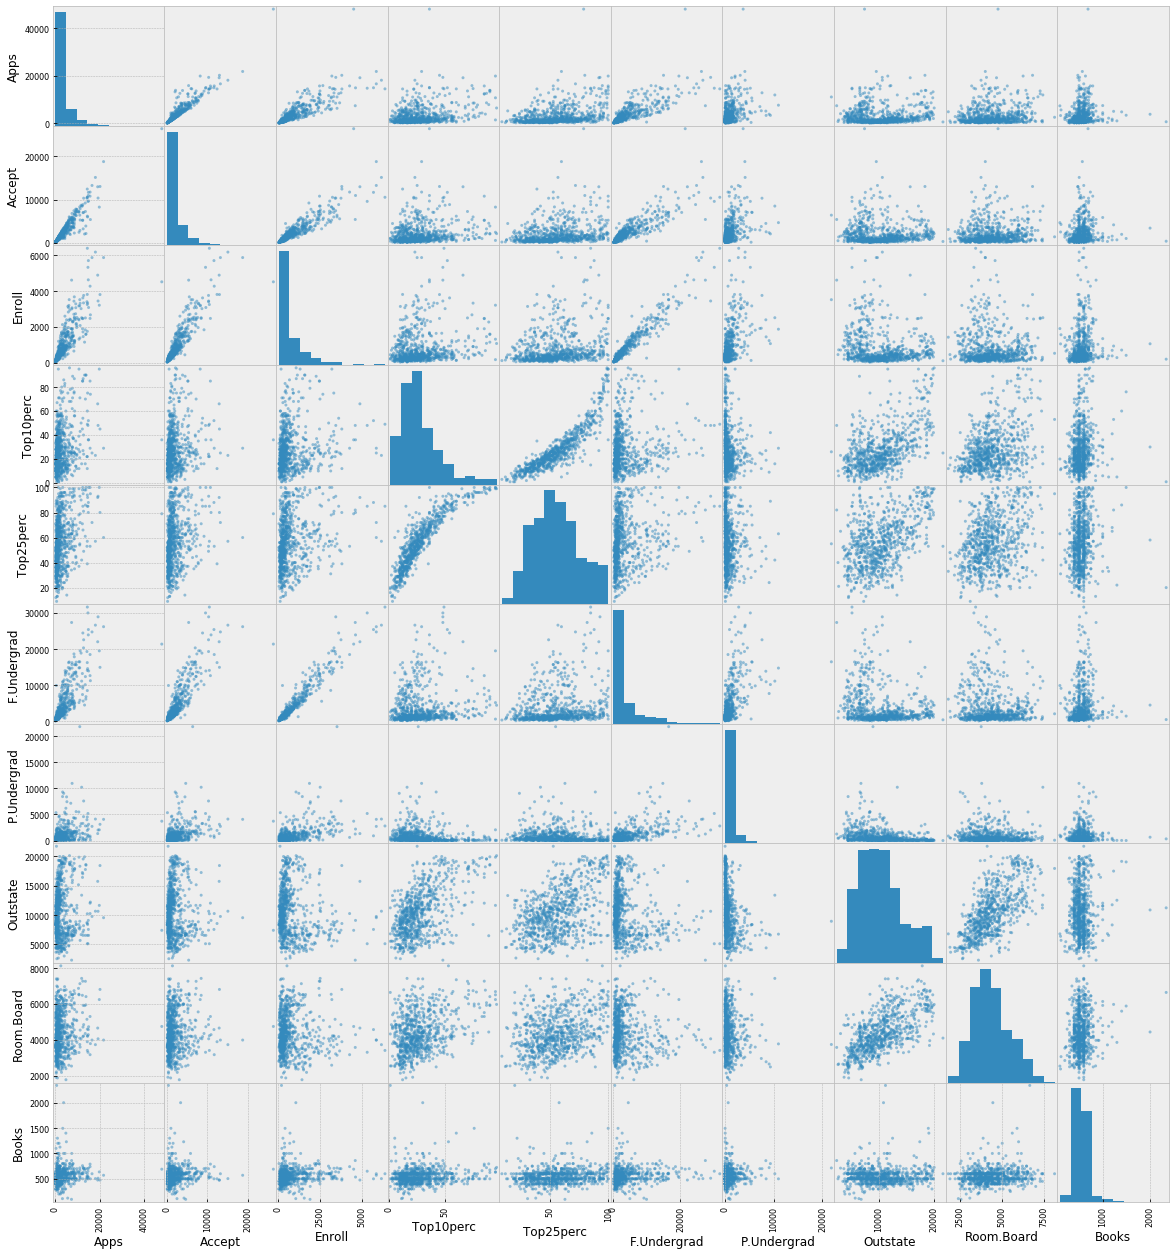

In [12]:
from pandas.plotting import scatter_matrix

scatter_matrix(df.iloc[:,:11], figsize=(20,22));

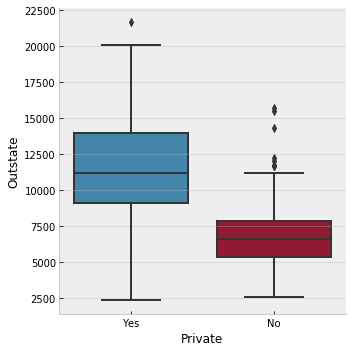

In [52]:
sns.catplot(x="Private", y="Outstate", data=df, kind="box")

now we are going to divide universities into two group based on wether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%

In [48]:
#copy the dataframe
df_elite = df.copy()

#create new variable and set the default value to 0
df_elite['Elite'] = 'No'

In [49]:
df_elite.loc[df_elite['Top10perc'] > 50, 'Elite'] = 'Yes'

In [51]:
df_elite['Elite'].groupby(by=df_elite['Elite']).count()

Elite
No     699
Yes     78
Name: Elite, dtype: int64

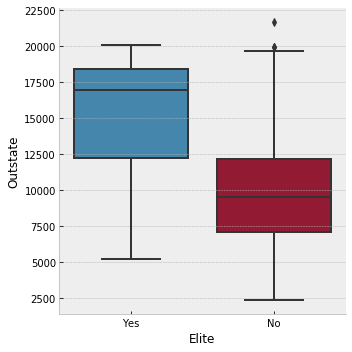

In [57]:
sns.catplot(x="Elite", y="Outstate", data=df_elite, order=['Yes','No'], kind="box");

### 3.2 Outlier detection

The simple way to detect outlier is using boxplot.

In [20]:
variables = [column for column in df]
variables.remove('Private')

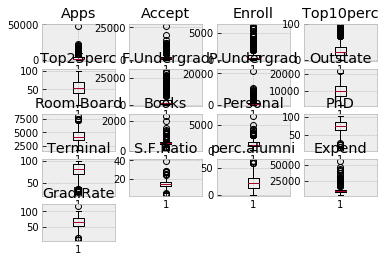

In [27]:
for i in range(0,len(variables)):
    plt.subplot(,4,i+1)
    plt.boxplot(df[variables[i]])
    plt.title(variables[i])

In [63]:
#create data frame for each type of university
privates = df['Private'].unique()

d = {private: df[df['Private'] == private] for private in privates}
d['Yes']

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,Yes,2768,2314,682,49,86,2802,86,15884,5370,530,730,92,94,15.2,34,10774,82
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [72]:
#set the quantile
low = .25
high = .75

bounds = {}
for private in privates:
    filt_df = d[private].loc[:, d[private].columns != 'Private'] #remove private column
    quant_df = filt_df.quantile([low, high])
    IQR = quant_df.iloc[1,:] - quant_df.iloc[0,:]
    quant_df.iloc[0,:] = quant_df.iloc[0,:] - 1.5 * IQR
    quant_df.iloc[1,:] = quant_df.iloc[1,:] + 1.5 * IQR
    bounds[private] = quant_df
    
bounds['Yes']

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0.25,-1731.5,-1117.5,-265.0,-11.5,0.0,-927.0,-654.0,1795.0,1240.0,225.0,-250.0,22.5,32.0,6.0,-11.0,1255.0,23.5
0.75,4536.5,3198.5,991.0,64.5,112.0,3785.0,1258.0,21275.0,7896.0,825.0,2550.0,122.5,128.0,19.6,61.0,17847.0,115.5


In [73]:
#Remove the outlier
df_new = {}

for private in privates:
    filt_df = d[private].loc[:, d[private].columns != 'Private']
    filt_df = filt_df.apply(lambda x: x[(x>bounds[private].loc[low, x.name]) & (x<bounds[private].loc[high, x.name])], axis=0)
    df_new[private] = pd.concat([filt_df,d[private].loc[:,'Private']], axis=1)
    
df_clean = result = pd.concat(df_new)
df_clean

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
Yes 0    1660.0  1232.0   721.0       23.0         52       2885.0   
    1    2186.0  1924.0   512.0       16.0         29       2683.0   
    2    1428.0  1097.0   336.0       22.0         50       1036.0   
    3     417.0   349.0   137.0       60.0         89        510.0   
    4     193.0   146.0    55.0       16.0         44        249.0   
...         ...     ...     ...        ...        ...          ...   
No  747  3100.0  2150.0   825.0        3.0         20       3234.0   
    751   950.0   713.0   351.0       42.0         72       1276.0   
    766  3325.0  2047.0  1301.0       20.0         45       5800.0   
    767  2320.0  1805.0   769.0       24.0         61       3395.0   
    772  2197.0  1515.0   543.0        4.0         26       3089.0   

         P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  Terminal  \
Yes 0          537.0    7440.0      3300.0  450.0    2200.0  70.0      78.0   
    1         1227.0   12280.0      6450.0  750.0    1500.0  29.0       NaN   
    2           99.0   11250.0      3750.0  400.0    1165.0  53.0      66.0   
    3           63.0   12960.0      5450.0  450.0     875.0  92.0      97.0   
    4          869.0    7560.0      4120.0  800.0    1500.0  76.0      72.0   
...              ...       ...         ...    ...       ...   ...       ...   
No  747        941.0    5542.0      3788.0  500.0    1300.0  75.0      79.0   
    751          9.0       NaN      5304.0  490.0    1410.0  77.0      77.0   
    766        872.0    4200.0      2700.0    NaN    1200.0  53.0      60.0   
    767        670.0    6400.0      3392.0  580.0    2150.0  71.0      80.0   
    772       2029.0    6797.0      3900.0  500.0    1200.0  60.0      60.0   

         S.F.Ratio  perc.alumni   Expend  Grad.Rate Private  
Yes 0         18.1         12.0   7041.0       60.0     Yes  
    1         12.2         16.0  10527.0       56.0     Yes  
    2         12.9         30.0   8735.0       54.0     Yes  
    3          7.7         37.0      NaN       59.0     Yes  
    4         11.9          2.0  10922.0        NaN     Yes  
...            ...          ...      ...        ...     ...  
No  747       15.7         20.0   4222.0       65.0      No  
    751       14.9         17.0   8837.0       87.0      No  
    766       20.2         18.0   5318.0       58.0      No  
    767       12.8         26.0   6729.0       59.0      No  
    772       21.0         14.0   4469.0       40.0      No  

[777 rows x 18 columns]

### Check for Missing value

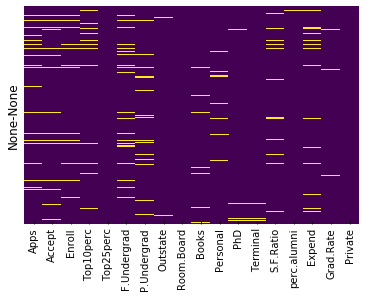

In [74]:
sns.heatmap(df_clean.isnull(), yticklabels=False, cbar=False, cmap='viridis')

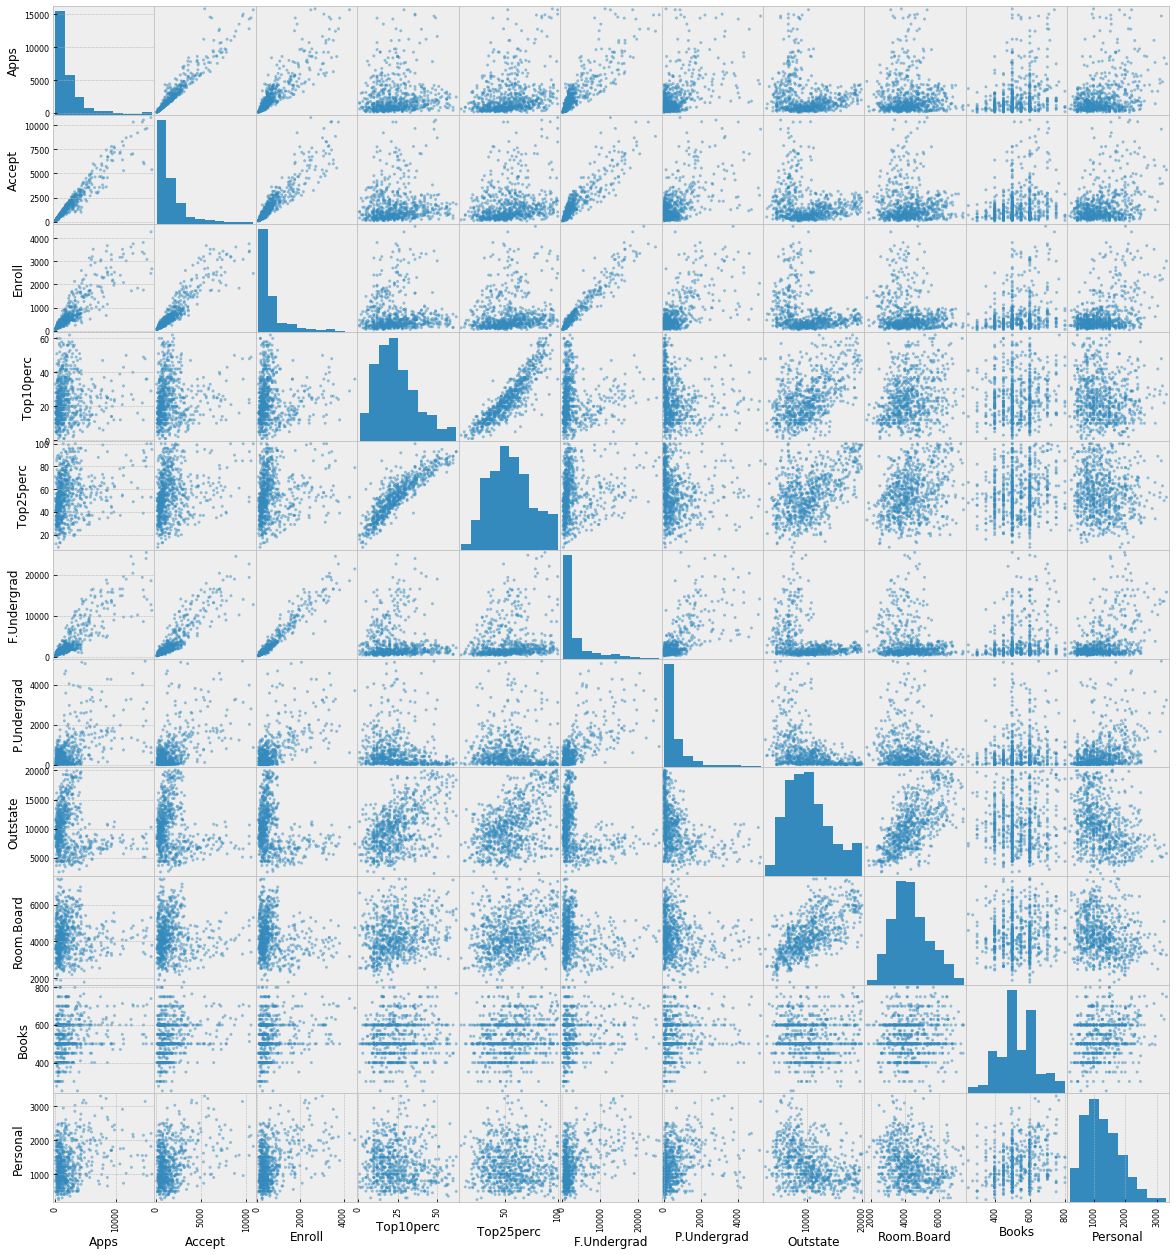

In [75]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_clean.iloc[:,:11], figsize=(20,22));